<h1 align = "center">机器学习第三次实验报告</h1>

<h5 align = "center">姓名：邢清画&nbsp&nbsp&nbsp&nbsp         学号：2211999  &nbsp &nbsp&nbsp专业：物联网工程</h5>

### 实验题目

- 参数估计 & 非参数估计

### 一、实验要求

#### **基本要求：**

生成两个各包含 N=1000 个二维随机向量的数据集合 $X_1$ 和 $X_2$，数据集合中随机向量来自于三个分布模型，分别满足均值向量 $\mu_1=[1,4]$,$\mu_2=[4,1]$, $\mu_3=[8,4]$ 和协方差矩阵 $D_1=D_2=D_3=2\pmb{I}$ ，其中$\pmb{I}$是 $2*2$的单位矩阵。在生成数据集合 $X_1$ 时，假设来自三个分布模型的先验概率相同 ；而在生成数据集合 $X_2$ 时，先验概率如下：$p(w_1)=0.6$, $p(w_2)=0.3$, $p(w_3)=0.1$

在两个数据集合上分别应用“似然率测试规则” 和“最大后验概率规则” 进行分类实验，计算分类错误率，分析实验结果。

#### **中级要求：**

在两个数据集合上使⽤⾼斯核函数估计⽅法，应⽤“似然率测试规则”分类和“最大后验概率规则”在 [0.1, 0.5, 1, 
1.5, 2] 范围内交叉验证找到最优 h 值，分析实验结果

#### **高级要求：**

在两个数据集合上使⽤进⾏k-近邻概率密度估计，计算并分析 k=1，3，5 时的概率密度估计结果

### 二、代码实现与结果分析

#### 1. **基本要求**

##### **1.1 似然率测试规则**

假设数据 X 是从多个类别 w1,w2,…,wk​ 中生成的，对于每个类别 wi​，其概率密度函数为 p(X∣wi)。似然率测试规则的目标是对于每个样本 X，通过比较不同类别下的似然函数 p(X∣wi) 的值，决定 X 更可能属于哪个类别。具体来说，如果对于 wi​ 和 wj​，有：

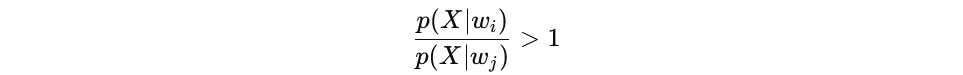

则我们认为 X 更可能来自 wi​ 类，而非 wj​ 类。

##### **1.1.1 关键方法**

##### **1. 生成数据集 X1 和 X2**

我们首先生成实验中要求的两个数据集 X1​ 和 X2​，其中每个数据集包含1000个二维随机向量，来自三个不同的分布模型。分布均值和协方差矩阵分别为：

μ1=[1,4],μ2=[4,1],μ3=[8,4]

协方差矩阵 D1=D2=D3=2I，其中 I 是 2 维单位矩阵。

在生成 X1​ 时，假设来自三个分布的先验概率相同；在生成 X2​ 时，假设先验概率分别为 p(w1)=0.6,p(w2)=0.3,p(w3)=0.1。

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.neighbors import KernelDensity
from scipy.stats import multivariate_normal
from sklearn.model_selection import KFold

# 设置字体为 SimHei
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号
# 生成伪数据集 X1 和 X2
N = 1000
means = [[1, 4], [4, 1], [8, 4]]
cov = 2 * np.eye(2)
priors = [0.6, 0.3, 0.1]

# 生成 X1 数据集 (先验概率相同)
X1_class1 = np.random.multivariate_normal(means[0], cov, N // 3)
X1_class2 = np.random.multivariate_normal(means[1], cov, N // 3)
X1_class3 = np.random.multivariate_normal(means[2], cov, N - 2 * (N // 3))
X1 = np.vstack((X1_class1, X1_class2, X1_class3))

# 生成 X2 数据集 (先验概率不同)
X2_class1 = np.random.multivariate_normal(means[0], cov, int(priors[0] * N))
X2_class2 = np.random.multivariate_normal(means[1], cov, int(priors[1] * N))
X2_class3 = np.random.multivariate_normal(means[2], cov, N - int(priors[0] * N) - int(priors[1] * N))
X2 = np.vstack((X2_class1, X2_class2, X2_class3))

# 输出数据集形状
print(f"X1 shape: {X1.shape}")
print(f"X2 shape: {X2.shape}")

X1 shape: (1000, 2)
X2 shape: (1000, 2)


##### **2. 定义似然率测试规则函数**

接下来我们定义似然率测试规则函数，该函数将基于各类的似然值进行分类。

计算每个类别的似然值 p(X∣wi):

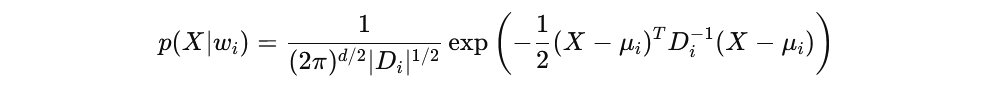

返回最大似然值所对应的类别。

In [9]:
# 似然率测试规则
def likelihood_ratio_test(X, mu_list, cov):
    likelihoods = []
    for mu in mu_list:
        likelihood = multivariate_normal.pdf(X, mean=mu, cov=cov)
        likelihoods.append(likelihood)
    return np.argmax(likelihoods, axis=0)

# 类别均值列表
mu_list = [means[0], means[1], means[2]]

# 对 X1 和 X2 进行分类
pred_X1_lrt = likelihood_ratio_test(X1, mu_list, cov)
pred_X2_lrt = likelihood_ratio_test(X2, mu_list, cov)

##### **3. 生成真实标签并计算分类错误率**

根据数据集的生成方式，生成每个样本的真实标签，然后计算分类的错误率。

X1​ 的真实标签是均匀分布的三类。

X2​ 的真实标签根据先验概率分布生成。

定义计算错误率的函数，并输出错误率。

In [10]:
# 生成 X1 和 X2 的真实标签，确保长度为 1000
true_labels_X1 = np.hstack([np.zeros(len(X1_class1)), np.ones(len(X1_class2)), np.full(len(X1_class3), 2)])
true_labels_X2 = np.hstack([np.zeros(len(X2_class1)), np.ones(len(X2_class2)), np.full(len(X2_class3), 2)])

# 检查标签和预测结果的形状是否匹配
print(f"True labels X1 shape: {true_labels_X1.shape}")
print(f"Predicted labels X1 shape: {pred_X1_lrt.shape}")
print(f"True labels X2 shape: {true_labels_X2.shape}")
print(f"Predicted labels X2 shape: {pred_X2_lrt.shape}")

# 计算分类错误率的函数
def calculate_error_rate(true_labels, pred_labels):
    errors = np.sum(true_labels != pred_labels)
    return errors / len(true_labels)

# 计算 X1 和 X2 的错误率
error_rate_X1_lrt = calculate_error_rate(true_labels_X1, pred_X1_lrt)
error_rate_X2_lrt = calculate_error_rate(true_labels_X2, pred_X2_lrt)

print(f"Error rate for X1 (Likelihood Ratio Test): {error_rate_X1_lrt:.4f}")
print(f"Error rate for X2 (Likelihood Ratio Test): {error_rate_X2_lrt:.4f}")


True labels X1 shape: (1000,)
Predicted labels X1 shape: (1000,)
True labels X2 shape: (1000,)
Predicted labels X2 shape: (1000,)
Error rate for X1 (Likelihood Ratio Test): 0.0810
Error rate for X2 (Likelihood Ratio Test): 0.0670


##### **4. 可视化分类结果**

使用散点图将两个数据集的分类结果可视化，帮助理解似然率测试规则的分类效果。

绘制 X1​ 和 X2​ 的分类结果。

不同的类别用不同的颜色表示，结果更加直观。

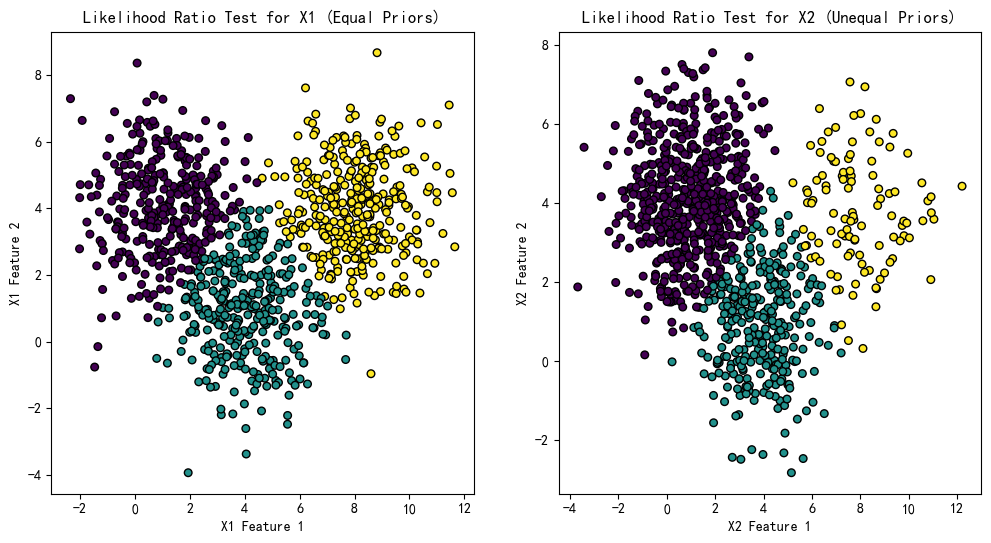

In [344]:
# 可视化分类结果
plt.figure(figsize=(12, 6))

# X1 分类结果
plt.subplot(1, 2, 1)
plt.scatter(X1[:, 0], X1[:, 1], c=pred_X1_lrt, cmap='viridis', edgecolor='k', s=30)
plt.title('Likelihood Ratio Test for X1 (Equal Priors)')
plt.xlabel('X1 Feature 1')
plt.ylabel('X1 Feature 2')

# X2 分类结果
plt.subplot(1, 2, 2)
plt.scatter(X2[:, 0], X2[:, 1], c=pred_X2_lrt, cmap='viridis', edgecolor='k', s=30)
plt.title('Likelihood Ratio Test for X2 (Unequal Priors)')
plt.xlabel('X2 Feature 1')
plt.ylabel('X2 Feature 2')

plt.show()

##### **1.1.2 结果分析**

**1. X1 和 X2 的分类结果对比**

在两幅散点图中，不同颜色的点表示模型对数据进行分类的结果。

**X1​ 数据集 (Equal Priors)：**

X1​ 数据集的先验概率相同，因此分类器在做决策时完全依赖类条件概率 P(X∣wi)，而忽略了先验概率。从散点图可以看出，三个类别的样本分布较为均匀，分类边界也较为清晰，表明似然率测试规则在这种情况下表现良好。分类错误率为 8%，表明该分类器在不考虑先验概率的情况下对均匀分布的样本分类表现较好。

**X2​ 数据集 (Unequal Priors)：**

对于数据集 X2​，先验概率不同，尽管如此，似然率测试规则并没有考虑到先验概率的差异，而是依赖于类条件概率 P(X∣wi) 来做出决策。从图中可以看出，三个类别的样本依旧可以通过类条件概率清楚区分。然而，类别 w1​ 的样本比例在该数据集中更大，因此该类的样本被分类器更容易正确分类，而其他类别的错误率略高。

在 X2​ 数据集中，分类错误率比 X1​ 数据集**更低**的原因主要与**先验概率的不同**有关：

似然率测试规则本质上是基于每个类别的样本分布和先验概率来调整分类边界。在 X2​ 中，高先验概率的类别 w1​ 在分类边界处获得了更大的“权重”，使得其他类别的边界向其靠拢。这种边界的偏移减少了高先验类别的误分机会，提高了分类的准确性。X1​ 数据集的先验概率是均等的，分类边界对所有类别的偏好相同，没有明显的偏向性。因此，分类错误率会更高。

##### **1.2 最大后验概率规则**

最大后验概率规则是基于贝叶斯定理的分类决策方法。该规则通过结合数据的类条件概率（即样本在某个类别上的似然概率）和类别的先验概率，来计算样本属于每个类别的后验概率。最终选择后验概率最大的类别作为预测结果。

贝叶斯定理描述了后验概率如何通过先验概率和似然函数来计算。其公式为：

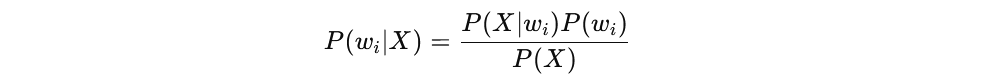

其中：

P(wi∣X)：样本 XX 属于类别 wi​ 的后验概率；

P(X∣wi)：在类别 wi​ 下观察到样本 X 的似然函数；

P(wi)：类别 wi​ 的先验概率；

P(X)：观测到样本 X 的总概率（归一化常数，可以忽略，因为对所有类别相同）。

在分类任务中，我们通常只关心后验概率的相对大小，因此 P(X) 可以被忽略，后验概率 P(wi∣X) 简化为：

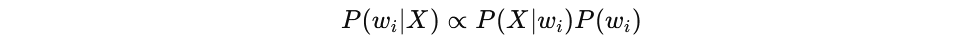

##### **实验目标**

在该实验中，生成两个二维随机向量数据集 X1​ 和 X2​，并基于**最大后验概率规则**对数据进行分类：对于数据集 X1​，假设三个类别的先验概率相同，即 P(w1)=P(w2)=P(w3)=1/3​；对于数据集 X2​，假设三个类别的先验概率不同，具体为 P(w1)=0.6，P(w2)=0.3，P(w3)=0.1。

##### **1.2.1 关键方法**

##### **1. 生成数据集**

每个数据集 X1​ 和 X2​ 包含 1000 个二维随机向量。这些向量分别来自于三个不同的正态分布，每个正态分布具有不同的均值和协方差矩阵。假设所有类别的协方差矩阵相同，为 2×I2×I，其中 II 是 2 维单位矩阵。

生成的均值向量分别为：

μ1=[1,4]；μ2=[4,1]；μ3=[8,4]

对于数据集 X1​，每个类别生成 1/3×1000=333 个样本，总共生成 1000 个样本。对于数据集 X2​，根据先验概率生成对应比例的样本数：类别 w1 生成 600 个样本，类别 w2​ 生成 300 个样本，类别 w3​ 生成 100 个样本。

In [345]:
# 输出数据集形状
print(f"X1 shape: {X1.shape}")
print(f"X2 shape: {X2.shape}")

X1 shape: (1000, 2)
X2 shape: (1000, 2)


##### **2. 定义最大后验概率规则函数**

对于每个数据点 X，我们通过计算其在各个类别 wi​ 下的后验概率来进行分类。首先，计算样本 X 属于类别 wi​ 的似然概率 P(X∣wi)：

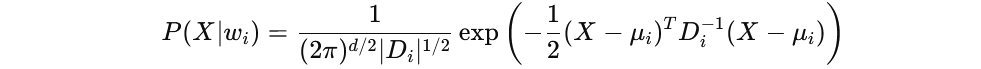

其中：

d 是样本的维度（在本实验中 d=2）；

Di​ 是类别 wi​ 的协方差矩阵，在本实验中为 2×I；

μi​ 是类别 wi​ 的均值向量；

X 是样本向量。

结合先验概率 P(wi)，后验概率 P(wi∣X)为：

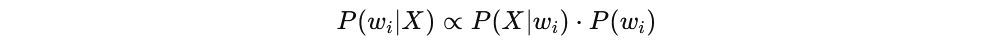

我们计算每个类别 wi​ 的后验概率，并选择后验概率最大的类别作为预测结果：

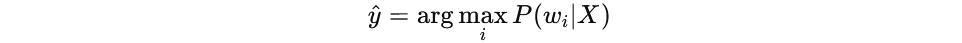

In [346]:
# 定义最大后验概率规则函数
def map_classification(X, mu_list, cov, priors):
    posteriors = []
    for i, mu in enumerate(mu_list):
        likelihood = multivariate_normal.pdf(X, mean=mu, cov=cov)
        posterior = likelihood * priors[i]
        posteriors.append(posterior)
    return np.argmax(posteriors, axis=0)

##### **3. 生成先验概率和真实标签**

对于两个数据集 X1​ 和 X2​，我们分别生成其先验概率和真实标签。这里，X1​ 的先验概率是均匀的，而 X2​ 的先验概率是不均匀的。

In [347]:
# 设置先验概率
prior_X1 = [1/3, 1/3, 1/3]  # X1的先验概率相同
prior_X2 = [0.6, 0.3, 0.1]  # X2的先验概率不同

# 生成 X1 和 X2 的真实标签
true_labels_X1 = np.hstack([np.zeros(len(X1_class1)), np.ones(len(X1_class2)), np.full(len(X1_class3), 2)])
true_labels_X2 = np.hstack([np.zeros(len(X2_class1)), np.ones(len(X2_class2)), np.full(len(X2_class3), 2)])

##### **4. 分类和计算分类错误率**

为了评估分类器的表现，我们计算分类错误率（Error Rate），即预测标签与真实标签不一致的比例。计算公式为：

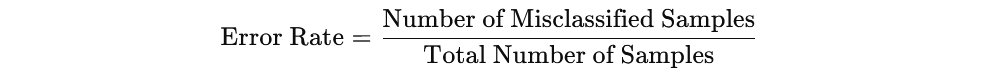

In [348]:
# 对 X1 和 X2 进行分类
pred_X1_map = map_classification(X1, mu_list, cov, prior_X1)
pred_X2_map = map_classification(X2, mu_list, cov, prior_X2)

# 计算分类错误率的函数
def calculate_error_rate(true_labels, pred_labels):
    errors = np.sum(true_labels != pred_labels)
    return errors / len(true_labels)

# 计算 X1 和 X2 的错误率
error_rate_X1_map = calculate_error_rate(true_labels_X1, pred_X1_map)
error_rate_X2_map = calculate_error_rate(true_labels_X2, pred_X2_map)

print(f"Error rate for X1 (MAP): {error_rate_X1_map:.4f}")
print(f"Error rate for X2 (MAP): {error_rate_X2_map:.4f}")

Error rate for X1 (MAP): 0.0810
Error rate for X2 (MAP): 0.0610


##### **5. 可视化结果**

最后，我们使用散点图来展示分类结果。在图中，不同颜色表示不同的类别，便于观察分类结果的分布情况。对于数据集 X1​ 和 X2​，我们分别绘制分类结果的散点图。

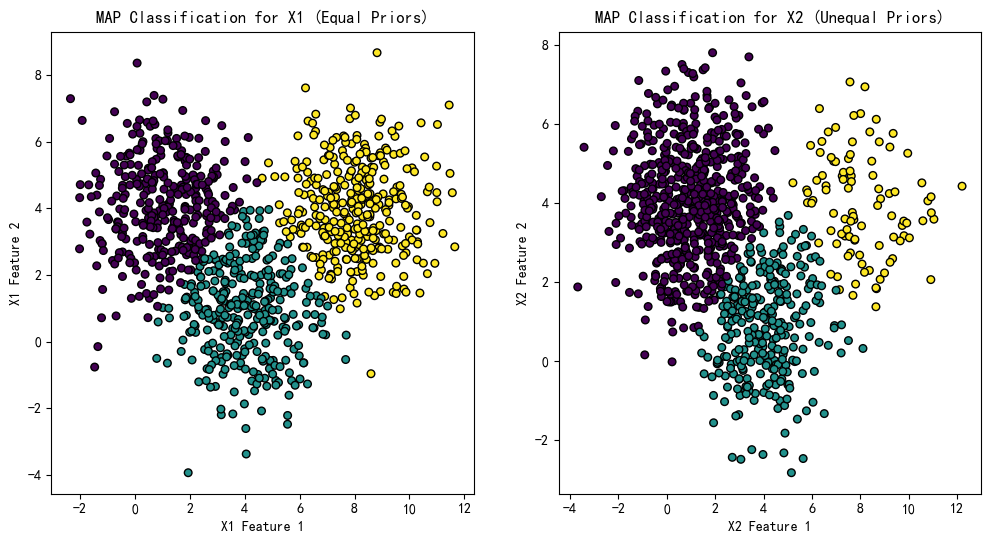

In [349]:
# 可视化分类结果
plt.figure(figsize=(12, 6))

# X1 分类结果
plt.subplot(1, 2, 1)
plt.scatter(X1[:, 0], X1[:, 1], c=pred_X1_map, cmap='viridis', edgecolor='k', s=30)
plt.title('MAP Classification for X1 (Equal Priors)')
plt.xlabel('X1 Feature 1')
plt.ylabel('X1 Feature 2')

# X2 分类结果
plt.subplot(1, 2, 2)
plt.scatter(X2[:, 0], X2[:, 1], c=pred_X2_map, cmap='viridis', edgecolor='k', s=30)
plt.title('MAP Classification for X2 (Unequal Priors)')
plt.xlabel('X2 Feature 1')
plt.ylabel('X2 Feature 2')

plt.show()

##### **1.2.2 结果分析**

**1. X1 和 X2 的分类结果对比**

**X1​ 数据集：**

由于 X1​ 数据集的先验概率是均匀的 P(w1)=P(w2)=P(w3)=1/3​，因此分类器仅基于类条件概率 P(X∣wi) 来做出决策。
        
从散点图可以看到，三个类别的分类边界比较明显，并且分布较均匀，符合先验概率相同的假设。由于先验概率相同，分类器只需根据各类别的均值和协方差来进行分类，表现出较为平衡的决策。

**X2​ 数据集：**

对于 X2​ 数据集，先验概率不同：P(w1)=0.6。先验概率较高的类别 w1​ 更倾向于吸引更多样本，从而影响分类决策。

从图中可以看出，类别 w1​ 的数据点更多，且分类器明显倾向于将更多的数据点分类为 w1​，这是因为类别 w1 具有更大的先验概率。相比之下，类别 w3​ 的数据点较少，因为它的先验概率较低，导致该类的样本在分类过程中更容易被误分类为其他类别，特别是类 w1​。

**2. 分类器表现的总结**

先验概率相同的分类器表现： 在 X1​ 数据集上，分类器主要依赖于类条件概率，分类表现较为均匀和平衡，三个类别的分类边界较清晰。

先验概率不同的分类器表现： 在 X2​ 数据集上，由于先验概率的影响，类别 w1​（先验概率最大的类别）在分类过程中占据了更多优势，分类边界向其他类别倾斜，特别是在类别 w3​（先验概率最低的类别）的附近。

**3. 对比结果的影响**

X1 的分类错误率高于 X2： 尽管 X2​ 的先验概率不均匀，分类错误率比 X1​ 还低。这表明，在先验概率不同的情况下，分类器能够更好地利用先验概率的权重来调整决策，从而减少某些类别的错误分类。

类别倾斜的影响： 类别 w1​ 由于较高的先验概率，使得分类器在 X2​ 数据集上的表现更加偏向 w1​，并且有效地减少了该类样本的错误分类。

**2. 两种规则结果的对比**

在使用最大后验概率规则时，相比似然率测试规则，X2​ 数据集的错误率仍然低于 X1​ 数据集的错误率。这进一步验证了先验概率的重要性：X2​ 数据集中类别 w1​ 拥有较高的先验概率，使得分类模型对该类别的偏好更明显，从而降低了整体错误率。相比之下，X1​ 数据集先验概率均等，导致分类边界的确定更加困难，错误率稍高。

#### 2. **中级要求**

在两个数据集合上使⽤⾼斯核函数估计⽅法，应⽤“似然率测试规则”分类和“最大后验概率规则”在 [0.1, 0.5, 1, 1.5, 2] 范围内交叉验证找到最优 h 值，分析实验结果

##### **2.1 关键功能**

##### **1. 分类错误率计算函数**

算分类错误率（错误样本的比例），用来衡量模型在测试集上的表现。给定预测标签 y_pred 和真实标签 y_true，错误率计算公式为：

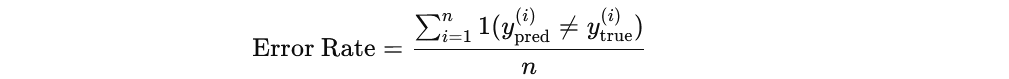

其中 n 是样本数，1(⋅) 表示指示函数，当预测标签与真实标签不同时为 1。

In [352]:
# 分类错误率计算函数
def classification_error_rate(y_pred, y_true):
    return np.sum(y_pred != y_true) / len(y_true)

##### **2.高斯核密度估计函数**

高斯核密度估计器计算某点 xx 的概率密度时，将其与其他点的距离考虑在内，公式为：

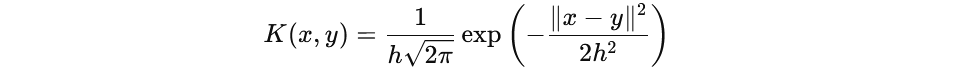

其中 h 为带宽参数，决定了核函数的平滑程度。带宽越小，核密度估计越敏感，容易过拟合。

In [353]:
# 手动实现的高斯核密度估计
def gaussian_kernel(x, y, bandwidth):
    return np.exp(-np.sum((x - y) ** 2) / (2 * bandwidth ** 2)) / (bandwidth * np.sqrt(2 * np.pi))

##### **3. 高斯核密度估计（向量化实现）**

改进的 kde_manual 函数通过向量化计算每个测试样本的密度值，以提高效率。

向量化操作：使用 diff 矩阵表示所有测试点与训练点之间的差值，通过计算每个差值的平方和，得到距离矩阵 distances，再将这些距离值代入高斯核公式，最终得到测试样本的密度估计。

返回测试样本的密度估计值，用于计算每个测试样本属于某一类的概率。

In [354]:
# def kde_manual(X_train, X_test, bandwidth):
#     n_train = X_train.shape[0]
#     densities = np.zeros(X_test.shape[0])
#     for i, test_point in enumerate(X_test):
#         for train_point in X_train:
#             densities[i] += gaussian_kernel(test_point, test_point, bandwidth)
#     return densities / n_train

# 改进的高斯核密度估计函数，使用向量化操作
def kde_manual(X_train, X_test, bandwidth):
    diff = X_test[:, np.newaxis, :] - X_train[np.newaxis, :, :]  # 向量化计算差值
    distances = np.sum(diff ** 2, axis=2)  # 计算平方和距离
    densities = np.exp(-distances / (2 * bandwidth ** 2)) / (bandwidth * np.sqrt(2 * np.pi))
    return np.mean(densities, axis=1)  # 求平均密度

##### **4. 基于 KDE 的似然概率和分类规则**

函数 kde_likelihood_manual：在给定训练数据和测试数据的情况下，利用 KDE 计算每个测试样本的似然概率。

函数 kde_likelihood_ratio_test_manual：实现基于似然率测试规则的分类，主要用于进行二分类或多分类任务。

分别计算每个类别的似然值，选取具有最大似然值的类别作为预测标签。似然率测试规则（LRT）在多分类问题中，计算似然概率的最大值：

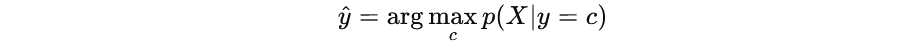

其中 p(X∣y=c) 为测试样本属于类别 c 的似然概率。

In [355]:
# 使用手动 KDE 来计算似然概率
def kde_likelihood_manual(X_train, X_test, bandwidth):
    return kde_manual(X_train, X_test, bandwidth)

# 使用手动 KDE 来进行似然率测试规则
def kde_likelihood_ratio_test_manual(X, priors, bandwidth, X_train_per_class):
    likelihoods = np.zeros((X.shape[0], len(X_train_per_class)))
    for i in range(len(X_train_per_class)):
        likelihoods[:, i] = kde_likelihood_manual(X_train_per_class[i], X, bandwidth)
    return np.argmax(likelihoods, axis=1)

##### **5. 基于 KDE 的最大后验概率规则（MAP）**

与 kde_likelihood_ratio_test_manual 类似，但在计算后验概率时考虑了类别的先验概率，即计算每个类别的后验概率并选择最大者。

对于每个类别 c，计算后验概率：

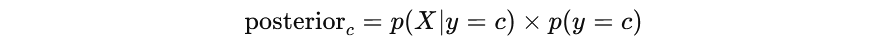

最终分类结果为具有最大后验概率的类别：

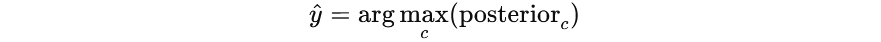

In [356]:
# 使用手动 KDE 来进行最大后验概率规则
def kde_maximum_a_posteriori_manual(X, priors, bandwidth, X_train_per_class):
    posteriors = np.zeros((X.shape[0], len(X_train_per_class)))
    for i in range(len(X_train_per_class)):
        likelihood = kde_likelihood_manual(X_train_per_class[i], X, bandwidth)
        posteriors[:, i] = likelihood * priors[i]
    return np.argmax(posteriors, axis=1)

##### **6. 使用交叉验证找到最优的 h 值**

交叉验证通过最小化平均错误率来选择最优的带宽参数，从而平衡模型的偏差和方差。

工作原理：使用 5 折交叉验证，依次将数据分成训练集和测试集，对每个 h 值进行训练和评估，记录平均错误率。

输出：返回错误率最低的 h 值，即最优的带宽参数。

In [357]:
# 使用交叉验证找到最优 h 值
def cross_validation_optimal_h(X, y, h_values, method='lrt', priors=None):
    kf = KFold(n_splits=5)
    errors = []

    for h in h_values:
        fold_errors = []
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            # 动态获取类别数量，将数据按类别分开
            X_train_per_class = [X_train[y_train == i] for i in np.unique(y_train)]
            
            # 根据方法进行分类
            if method == 'lrt':
                y_pred = kde_likelihood_ratio_test(X_test, priors, h, X_train_per_class)
            elif method == 'map':
                y_pred = kde_maximum_a_posteriori(X_test, priors, h, X_train_per_class)
            
            fold_error = classification_error_rate(y_pred, y_test)
            fold_errors.append(fold_error)
        
        errors.append(np.mean(fold_errors))
    
    optimal_h = h_values[np.argmin(errors)]
    return optimal_h, np.min(errors)

##### **7. 找到所有 h 值对应的错误率**

cross_validation_errors_vs_h：与 cross_validation_optimal_h 类似，但它返回每个带宽 h 值对应的错误率。

In [358]:
# 使用交叉验证找到所有 h 对应的错误率，不只找最优 h
def cross_validation_errors_vs_h(X, y, h_values, method='lrt', priors=None):
    kf = KFold(n_splits=5)
    errors_all_h = []

    for h in h_values:
        fold_errors = []
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            # 动态获取类别数量，将数据按类别分开
            X_train_per_class = [X_train[y_train == i] for i in np.unique(y_train)]
            
            # 根据方法进行分类
            if method == 'lrt':
                y_pred = kde_likelihood_ratio_test(X_test, priors, h, X_train_per_class)
            elif method == 'map':
                y_pred = kde_maximum_a_posteriori(X_test, priors, h, X_train_per_class)
            
            fold_error = classification_error_rate(y_pred, y_test)
            fold_errors.append(fold_error)
        
        errors_all_h.append(np.mean(fold_errors))
    
    return errors_all_h

##### **绘制错误率随 h 变化的曲线**

在图中标记错误率最低的 hh 值，清晰展示不同带宽对模型表现的影响，从而帮助选择合适的带宽。

In [359]:
# 对于不同规则，绘制错误率与h值的变化曲线
def plot_error_rate_vs_h(h_values, errors, title):
    plt.figure(figsize=(8, 6))
    plt.plot(h_values, errors, marker='o')
    plt.title(title)
    plt.xlabel(' h')
    plt.ylabel('Error rate')
    plt.grid(True)
    # 添加最优h值的标记
    optimal_h = h_values[np.argmin(errors)]
    plt.axvline(optimal_h, color='r', linestyle='--', label=f'Optimal h = {optimal_h}')
    plt.legend()
    plt.show()

##### **8. 设置带宽**

In [360]:
# 设置带宽 h 的候选值
h_values = [0.1, 0.5, 1, 1.5, 2]
#h_values = np.arange(0.1, 3.1, 0.03)

##### **9. 交叉验证和绘制曲线**

对 X1​ 和 X2​ 数据集分别使用两种分类规则（似然率测试规则和最大后验概率规则）进行交叉验证，找到最优的带宽 h。

使用 cross_validation_errors_vs_h 函数计算所有候选带宽对应的错误率。

调用 plot_error_rate_vs_h 函数绘制不同 hh 值下的错误率变化曲线，从而直观展示带宽对模型表现的影响，并确定最优 hh 值。

X1 dataset - 似然率测试规则 best_h: 0.5, Error rate: 0.0730
X2 dataset - 似然率测试规则  best_h: 1, Error rate: 0.1700
X1 dataset - 最大后验概率规则 best_h: 0.5, Error rate: 0.0730
X2 dataset - 最大后验概率规则 best_h: 1.5, Error rate: 0.1550


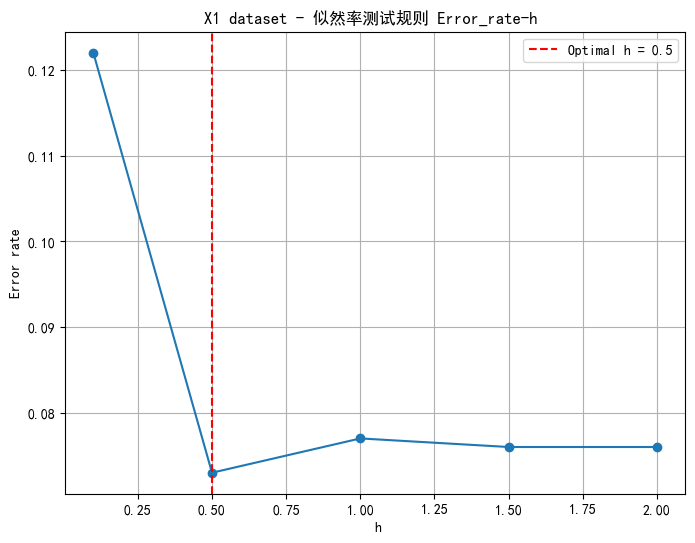

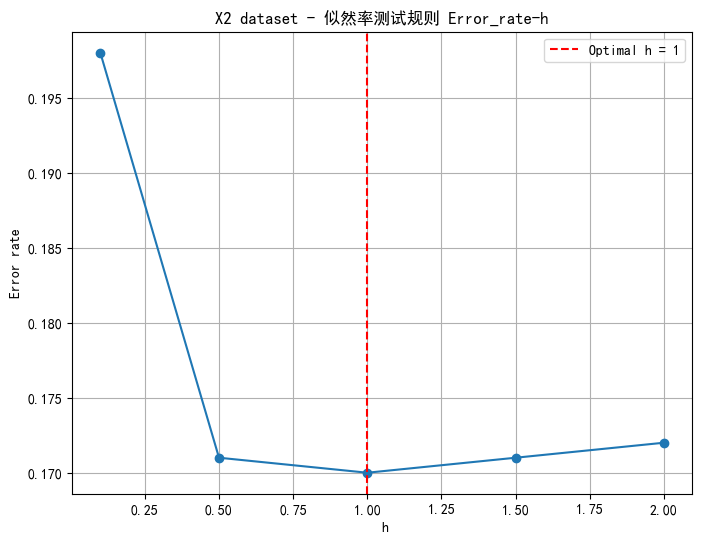

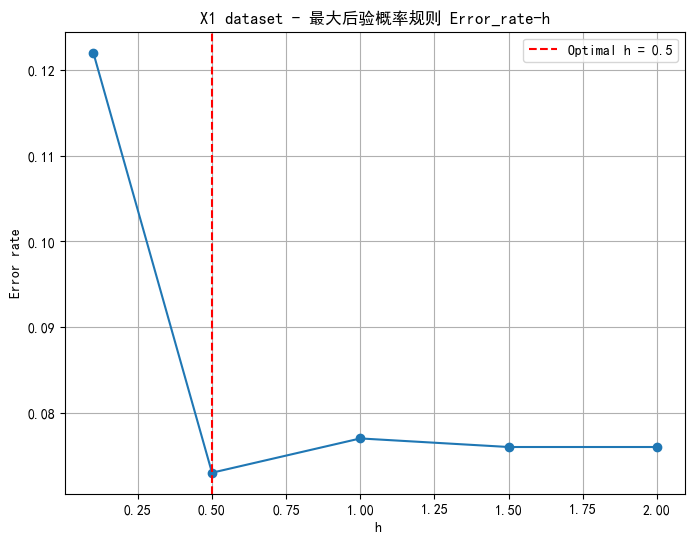

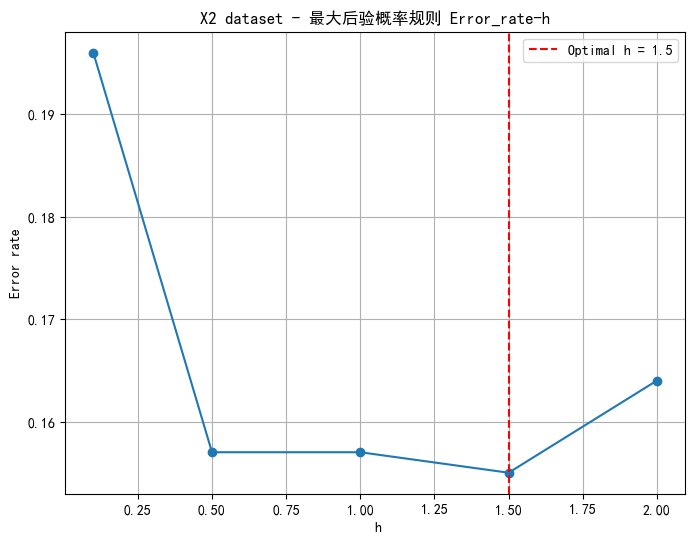

In [361]:
# 对 X1 数据集进行交叉验证，使用似然率测试规则找到最优 h 值
optimal_h_X1_lrt, error_X1_lrt = cross_validation_optimal_h(X1, labels_X1, h_values, method='lrt')
print(f"X1 dataset - 似然率测试规则 best_h: {optimal_h_X1_lrt}, Error rate: {error_X1_lrt:.4f}")

# 对 X2 数据集进行交叉验证，使用似然率测试规则找到最优 h 值
optimal_h_X2_lrt, error_X2_lrt = cross_validation_optimal_h(X2, labels_X2, h_values, method='lrt')
print(f"X2 dataset - 似然率测试规则  best_h: {optimal_h_X2_lrt}, Error rate: {error_X2_lrt:.4f}")

# 对 X1 数据集进行交叉验证，使用最大后验概率规则找到最优 h 值
optimal_h_X1_map, error_X1_map = cross_validation_optimal_h(X1, labels_X1, h_values, method='map', priors=priors_X1)
print(f"X1 dataset - 最大后验概率规则 best_h: {optimal_h_X1_map}, Error rate: {error_X1_map:.4f}")

#对 X2 数据集进行交叉验证，使用最大后验概率规则找到最优 h 值
optimal_h_X2_map, error_X2_map = cross_validation_optimal_h(X2, labels_X2, h_values, method='map', priors=priors_X2)
print(f"X2 dataset - 最大后验概率规则 best_h: {optimal_h_X2_map}, Error rate: {error_X2_map:.4f}")

#绘制 X1 和 X2 数据集的错误率随 h 的变化曲线

errors_X1_lrt = cross_validation_errors_vs_h(X1, labels_X1, h_values, method='lrt')
errors_X2_lrt = cross_validation_errors_vs_h(X2, labels_X2, h_values, method='lrt')
errors_X1_map = cross_validation_errors_vs_h(X1, labels_X1, h_values, method='map', priors=priors_X1)
errors_X2_map = cross_validation_errors_vs_h(X2, labels_X2, h_values, method='map', priors=priors_X2)
#绘制曲线

plot_error_rate_vs_h(h_values, errors_X1_lrt, 'X1 dataset - 似然率测试规则 Error_rate-h ')
plot_error_rate_vs_h(h_values, errors_X2_lrt, 'X2 dataset - 似然率测试规则 Error_rate-h')
plot_error_rate_vs_h(h_values, errors_X1_map, 'X1 dataset - 最大后验概率规则 Error_rate-h')
plot_error_rate_vs_h(h_values, errors_X2_map, 'X2 dataset - 最大后验概率规则 Error_rate-h')

##### **2.2 结果分析**

**带宽选择：**
带宽 h 影响核密度估计的平滑度。对于均匀分布的数据集 X1​，较小的带宽（如 h=0.5）可以在维持估计精度的同时避免过度平滑。而在类别分布不均的 X2​ 上，较大的带宽（如 h=1.0 或 h=1.5）能够更好地适应数据的真实分布，从而降低错误率。

**似然率测试规则：**
不考虑先验概率，仅根据似然概率进行分类。在 X1​ 和 X2​ 上，这种规则的最佳带宽较小，因为它更依赖于核密度估计的精度。

**最大后验概率规则：**
考虑先验概率，使得分类决策时更加重视类别分布信息。在 X2​ 上，较大的带宽可以更有效地整合先验信息，提供更加鲁棒的分类结果。

**错误率的变化趋势：**

通常，带宽 h 的最佳值应满足以下几点：

1. 小数据集或复杂数据分布：适合较小的带宽 h，因为这样可以更好地捕捉数据的细节。

2. 类别不均衡的数据集：适合稍大的带宽 h，可以减少对稀疏类别噪声的敏感性。

3. 带宽的变化趋势：**随着带宽的增加，错误率通常会先降低，达到一个最优点后再增大。**

带宽 h 较小时：估计器对数据点的变化非常敏感，这可能导致过拟合，因为密度估计会紧密围绕数据点，从而在分类任务中对噪声点也产生较高的响应。

带宽 h 较大时：估计器会进行更强的平滑，从而更好地捕捉整体分布趋势，减少对噪声的敏感性，但如果过大，可能会导致欠拟合，忽略数据的细节。

**在我的实验结果中：**

1. 均匀分布的 X1​ 数据集：

因为均匀分布的样本间隔较小，不需要较大的平滑度即可得到良好的密度估计。倾向于较小的带宽，这样可以准确捕捉数据的细节。
    
2. 类别不均的 X2​ 数据集：

数据集中类别不均，适当增大带宽能够平滑稀疏类别的噪声，倾向于较大的带宽，以增加平滑度、减少噪声影响，特别是在使用先验概率的最大后验概率规则时。

#### 3. **高级要求**

在两个数据集合上使⽤进⾏k-近邻概率密度估计，计算并分析 k=1，3，5 时的概率密度估计结果

##### **3.1 关键功能**

##### 数据加载

In [369]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# k 值的集合
k_values = [1, 3, 5]
X_datasets = [X1, X2]
dataset_labels = ['X1', 'X2']

##### **k-近邻密度估计**

通过 NearestNeighbors(n_neighbors=k+1) 找到每个数据点到其第 kk 个邻居的距离。
使用第 k 个邻居的距离 dk​ 来计算密度，密度计算公式为：

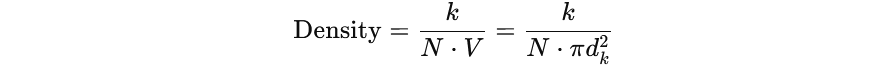

In [370]:
def calculate_knn_density(X, k):
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(X)  # 使用 k+1 个邻居，因为第一个是自身
    distances, _ = nbrs.kneighbors(X)
    d_k = distances[:, k]  # 第 k 个邻居的距离
    V = np.pi * (d_k ** 2)  # 近似为圆的面积
    density = k / (len(X) * V)
    return density

##### 颜色条带设置

**使用分位数来限定颜色条范围：**
可以根据密度值的分布，取较低的分位数作为 vmin 和较高的分位数作为 vmax，以过滤掉极值的影响。例如，可以设置 vmin 为密度值的 10% 分位数，vmax 为密度值的 90% 分位数。

**自定义一个适合的 vmin 和 vmax：**
在查看 all_densities 的分布范围后，选择一个适中的值作为颜色条的最大值，确保大部分点的颜色显示在颜色条范围内。

In [372]:
# 计算所有 k 值和数据集的密度范围，用于设置颜色条范围（使用分位数）
all_densities = []
for X in X_datasets:
    for k in k_values:
        density = calculate_knn_density(X, k)
        all_densities.extend(density)

# 设置颜色条范围为 10% 和 90% 分位数
vmin = np.percentile(all_densities, 10)
vmax = np.percentile(all_densities, 90)

k-近邻密度估计平均值对比:
k = 1: X1 平均密度 = 0.1584, X2 平均密度 = 0.1017
k = 3: X1 平均密度 = 0.0213, X2 平均密度 = 0.0275
k = 5: X1 平均密度 = 0.0183, X2 平均密度 = 0.0239


C:\Users\lenovo\AppData\Local\Temp\ipykernel_60504\2359262618.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


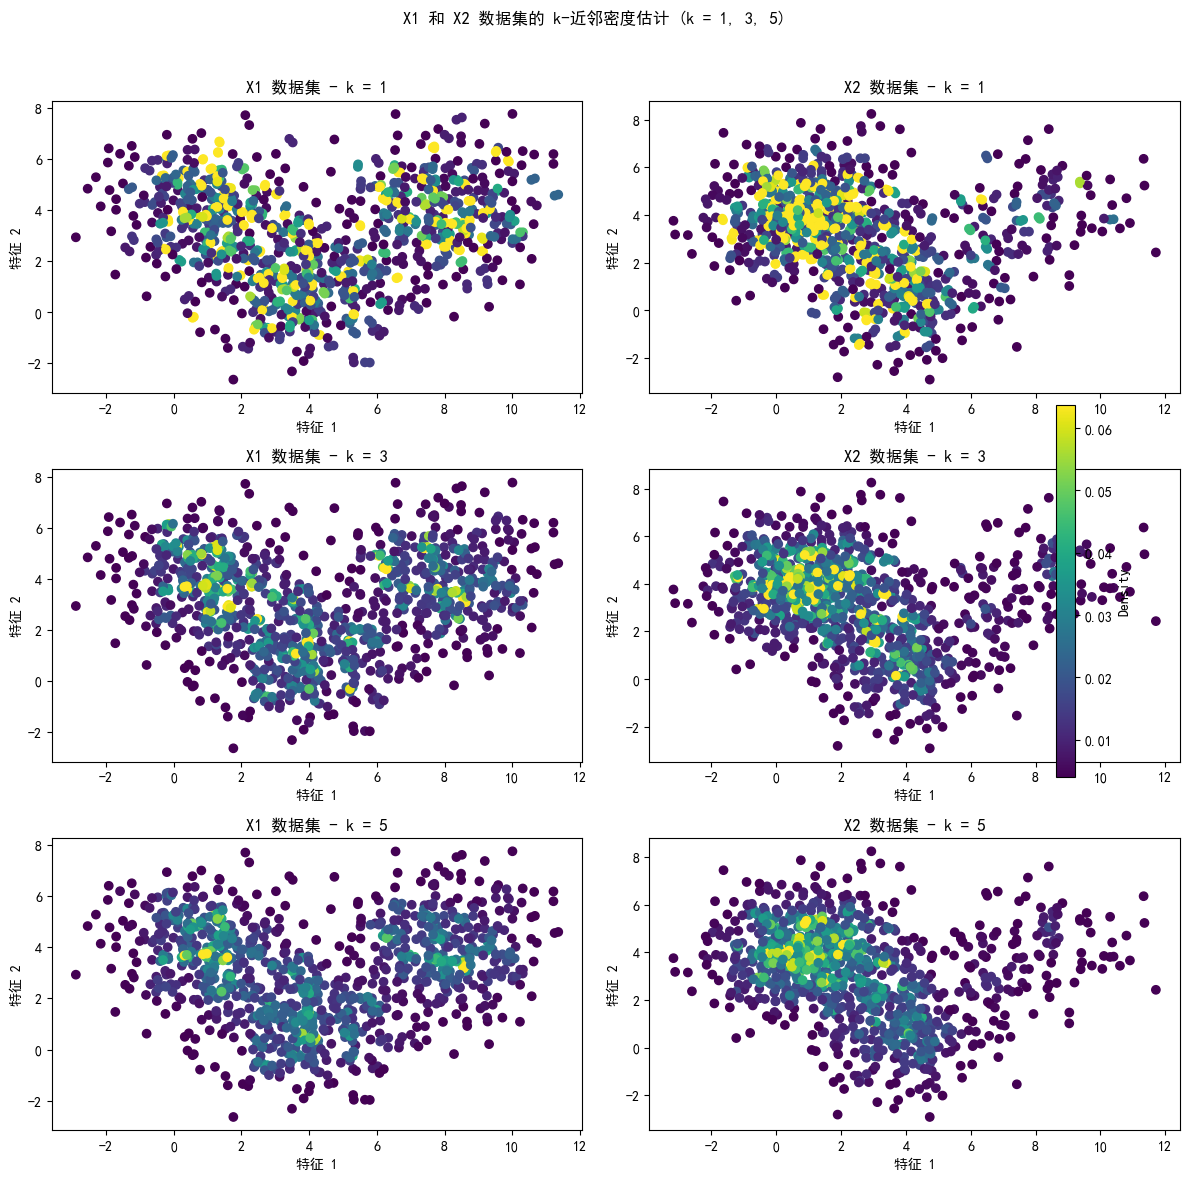

In [373]:
# 绘制密度估计图
fig, axes = plt.subplots(len(k_values), len(X_datasets), figsize=(12, 12))
for i, k in enumerate(k_values):
    for j, (X, label) in enumerate(zip(X_datasets, dataset_labels)):
        density = calculate_knn_density(X, k)
        sc = axes[i, j].scatter(X[:, 0], X[:, 1], c=density, cmap='viridis', vmin=vmin, vmax=vmax)
        axes[i, j].set_title(f'{label} 数据集 - k = {k}')
        axes[i, j].set_xlabel('特征 1')
        axes[i, j].set_ylabel('特征 2')

# 计算并打印平均密度
print("k-近邻密度估计平均值对比:")
for k in k_values:
    avg_density_X1 = np.mean(calculate_knn_density(X1, k))
    avg_density_X2 = np.mean(calculate_knn_density(X2, k))
    print(f"k = {k}: X1 平均密度 = {avg_density_X1:.4f}, X2 平均密度 = {avg_density_X2:.4f}")

# 添加统一的颜色条
fig.colorbar(sc, ax=axes, orientation='vertical', fraction=0.02, pad=0.04, label="Density")
plt.suptitle("X1 和 X2 数据集的 k-近邻密度估计 (k = 1, 3, 5)")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

##### **3.2 结果分析**

**1. 平均密度值：**

平均密度随着 k 的增大逐渐减小，符合 k-近邻密度估计的理论。当 k 较小时，密度估计会偏向局部特征，波动较大；当 k 增大时，局部密度被平滑化，平均密度趋向一个较小且稳定的值。

**1.1 当 k=1 时：**

每个点的密度仅考虑其最近邻的距离，因此密度值反映了数据集的局部稀疏程度。

X1​ 数据集是均匀分布的，且每个类别样本数相等，因此整体上密度分布较均匀。

X2​ 数据集中类别分布不均衡，有一部分样本集中在中心区域，导致整体平均密度略低于 X1​，因为 X2​ 中存在更多稀疏区域。

**1.2 当 k=3 时：**

密度估计逐渐平滑化，减少了对单一数据点的依赖，因此密度数值整体下降。

X2​ 数据集的平均密度略高于 X1​ 的平均密度，因为 X2 中的大部分数据点集中在中心区域，且考虑到更多邻居后，这些密集区域的密度估计会更高。

由于 X1​ 的分布较均匀，没有特别密集的区域，因此其密度估计整体偏低。

**1.3 当 k=5 时：**

密度估计更平滑，平均密度值继续下降。

X2​ 的平均密度继续高于 X1​，原因同上：X2​ 数据集的样本更多集中在某一区域，这些区域的密度更高，因此在密度估计平滑化的情况下，X2​ 的密度依然较高。

X1​ 数据集的分布较均匀，因此其局部密度在较大 k 下进一步平滑，整体上密度值较低。

X1​ 和 X2​ 的平均密度差异与它们的分布特性有关。均匀分布的 X1​ 在不同 k 值下的密度估计相对较低，而 X2​ 中的高密度区域显著影响了其平均密度，使其在 k=3 和 k=5 时的密度较高。

**2. 密度分布图：**

**总体趋势：**

随着 k 的增大，数据集中的局部密度差异逐渐减小，图中的颜色分布也更加均匀。这符合 k-近邻密度估计的特点：当 k 较小时，密度估计会更加敏感，密度图上颜色变化较大；而当 k 增大时，局部密度被更多邻居平滑化，导致图中颜色差异减小。

**数据集差异：**

X1​ 数据集的密度分布比较均匀，因为各类别的样本数量相同，且分布较为对称。

X2​ 数据集的密度在中心区域更高，周围稀疏区域的密度更低。由于 X2​ 数据集的类别不均衡，且类别集中在中心区域，因此导致中心区域的密度较高。

### 三、实验总结

**1. 最大后验概率和似然率测试规则：**

 在基础实验中，我首先学习了最大后验概率（MAP）和似然率测试（LRT）两种分类方法的实现。通过这部分实验，我体会到先验概率的影响，特别是在类别不均衡的数据集中，MAP 方法更适合结合先验概率的信息，从而提升分类准确性。在代码中遇到的挑战是如何合理地分配和计算先验概率，并理解这两种规则在不同场景中的应用差异。

**2. 带宽 h 的选择：**

 在中级实验中，通过使用核密度估计（KDE），我学习了带宽 h 在密度估计中的关键作用。合适的带宽选择可以显著提高估计的效果，但选择不当会导致过拟合或欠拟合。为了找到最佳带宽，我实现了交叉验证方法，这使我加深了对 KDE 中平滑参数的重要性 的理解。此外，实验中遇到的问题是，过大的 h 会导致估计图缺乏细节，过小的 h 则会引入噪声。通过实验调优，我学会了如何在实际应用中调整带宽，使得密度估计更为合理。

**3. k-近邻密度估计：**

 高级实验中，我进一步探索了k-近邻密度估计的应用。k-近邻密度估计通过局部邻居的距离计算密度，适用于多种数据分布类型。我发现，k 的大小对密度估计影响显著：较小的 k 值使得密度估计更加敏感，而较大的 k 值则让结果更平滑且更稳定。此外，通过实验还了解到如何使用分位数设置颜色条范围，提高了密度分布图的可读性。这让我体会到可视化技巧在数据分析中的重要性。